# Step1: Importing necessary libraries 
pandas will be used to load the data into the notebook and also in accessing the dataset
numpy will be used for carrying out calculations
matplotlib.pyplot and seaborn will be used for visualizing the data
and scikit learn will be used to split the data, fit and train the model, in evaluating the model, and performing hyperparameter tuning. 

In [1]:
#Importing Necessary libraries that I will use in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
sns.set_style('whitegrid')

# Step 2: Assessing the Dataset 

In [3]:
#Loading the Dataset That we will use to train and validate our model on
data = pd.read_csv("Real_estate_dataset.csv",index_col="No")
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Step 3 Performing Exploratory Data analysis


In [9]:
data.info() # Returns the columns cotained in the dataset,null value if there is any ,and the data type that each of them contains

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


#
The Dataset has 414 entries on each each column, with no missing values and the data type of each column is numeric, that is either int64  or float64.   

In [132]:
print(data.describe())   #Returns the Summary statistics for Numerical Values i.e mean,min,max, std etc

       X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148971     17.712560   
std               0.281967     11.392485   
min            2012.667000      0.000000   
25%            2012.917000      9.025000   
50%            2013.167000     16.100000   
75%            2013.417000     28.150000   
max            2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                   

In [154]:
#Determining a correlation matrix of the dataset to see if the relationship between them is linear or non-linear(if linear the correction
#of most of the variables if greater than 0.7
data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0.5, 1.0, 'The Correlation Between Different Variable in the Dataset')

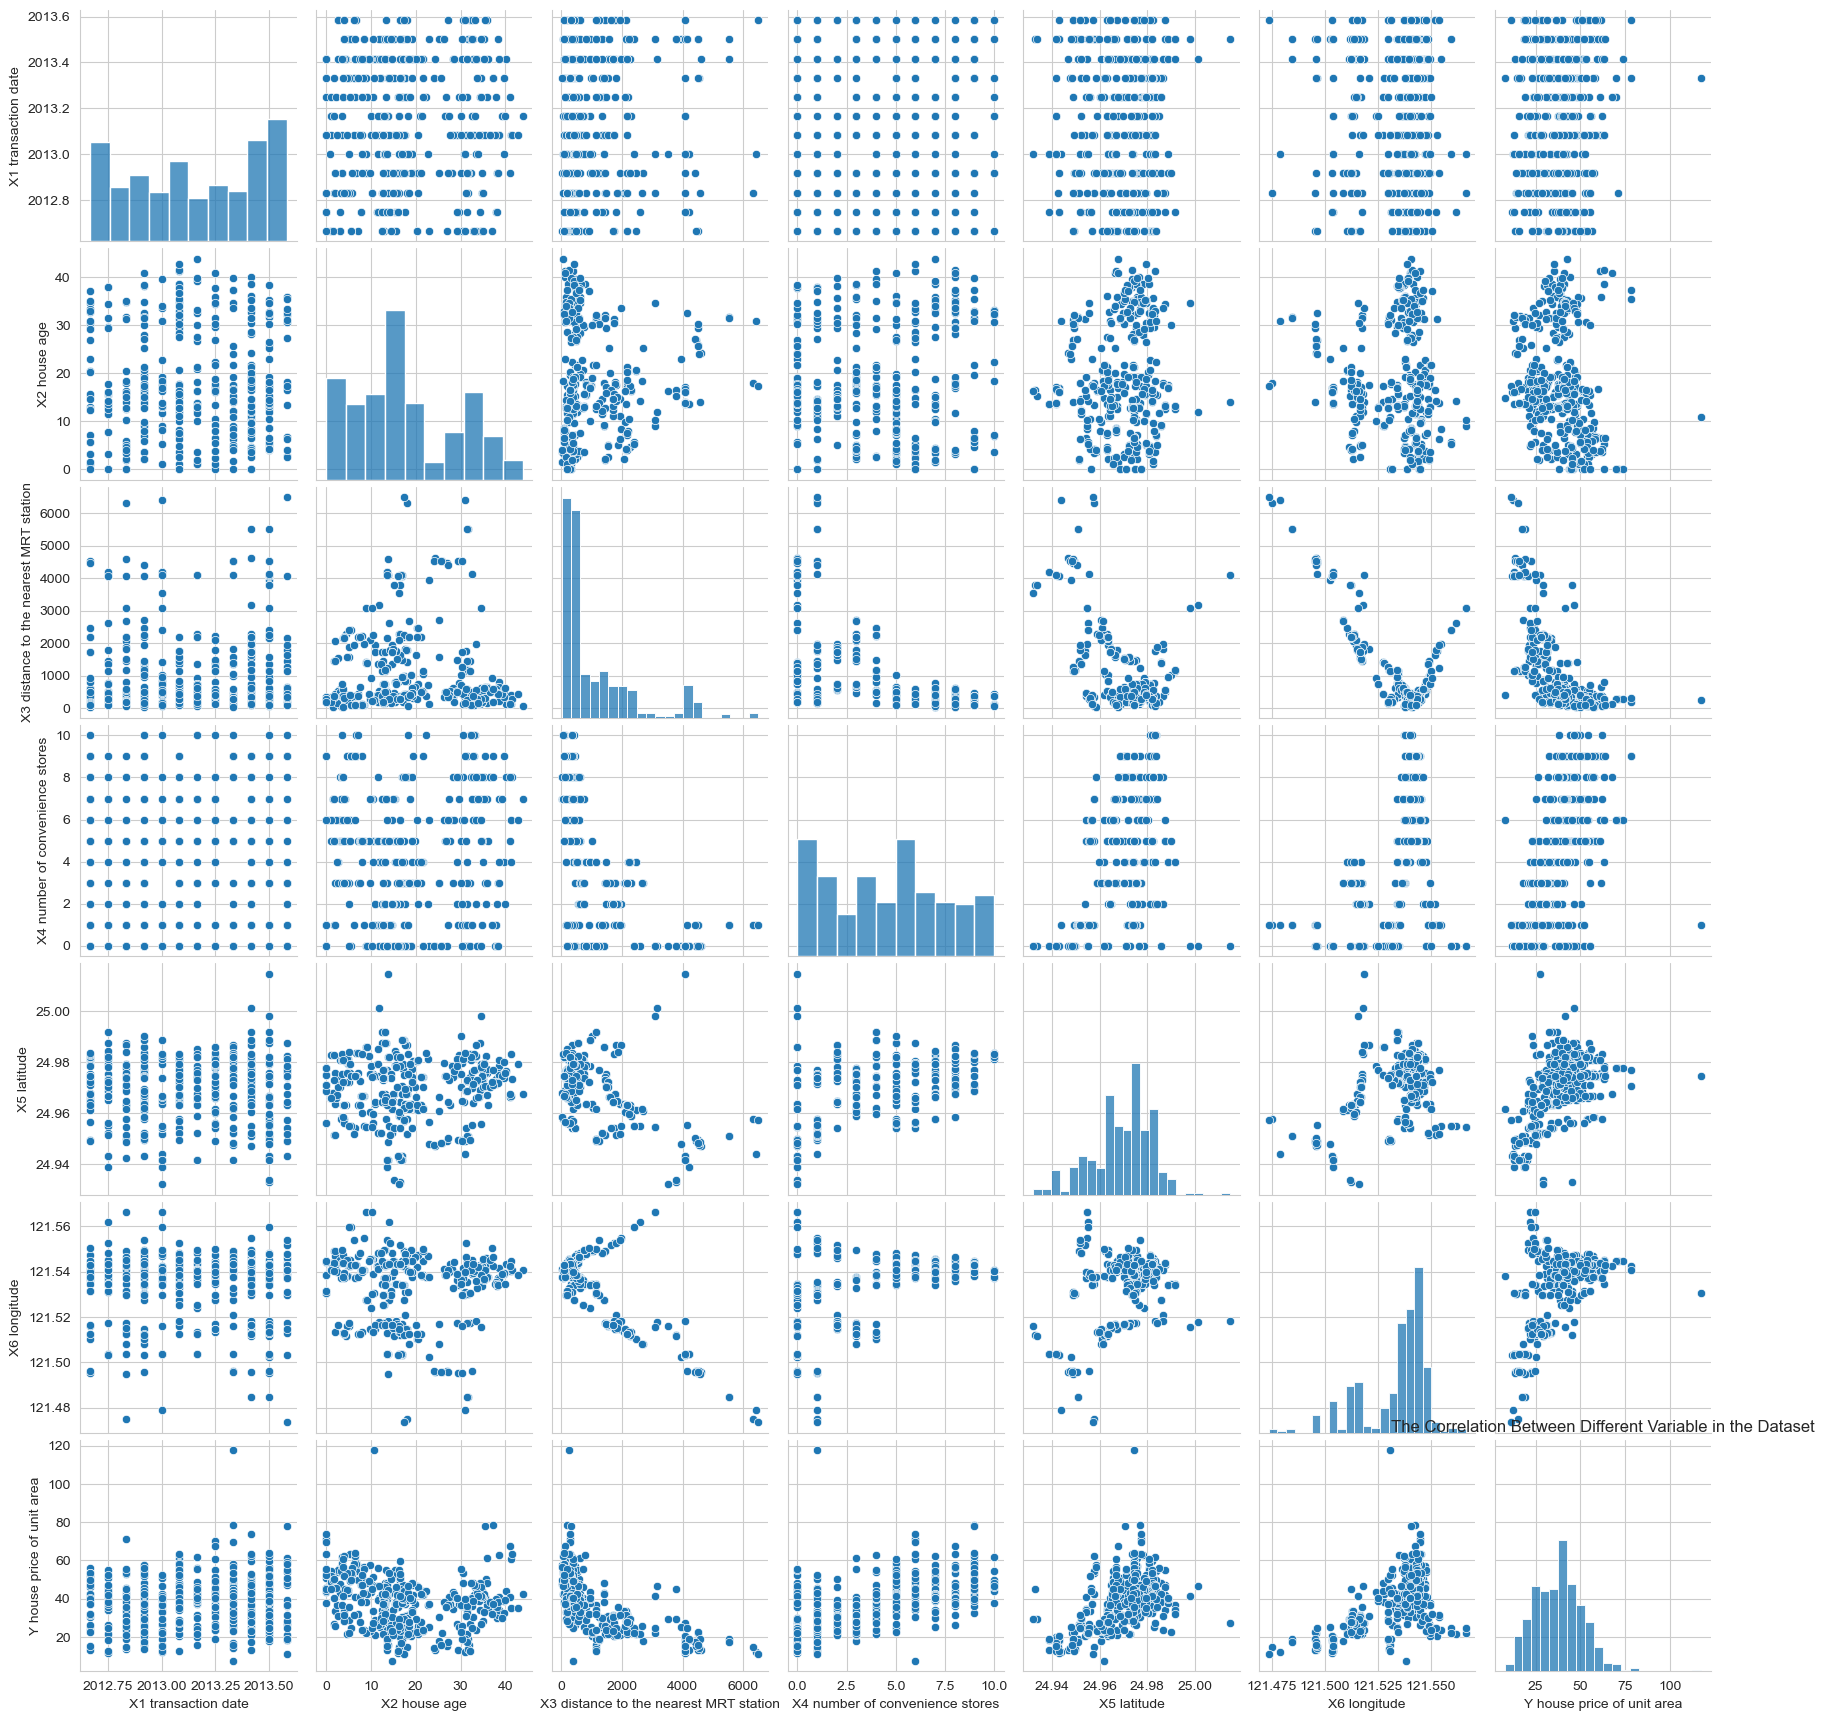

In [103]:
# Investigating the relationship between variables using a consolidated plot 
sns.pairplot(data, kind = "scatter")
plt.title("The Correlation Between Different Variable in the Dataset")

#
Since the correlation between different variables is less 0.7 there's a possibilty of a non_linear relationship.
This is because the correlation above 0.7 generally indicates a strong linear relationship between variables and vise versa. However, I'm going to fit a linear relationship because Linear Regression is suitable for predictions such as predicting house prices, and see how the model performs.
Most of the plots do not clearly show the relationship  between variables, only afew show. 
I will try to establish the relationship between the variables by fitting a line of best fit. 

# Step3: Specifying the dependent and independent variable, fitting a linear model and evaluating the model


In [164]:
#specifying out explanatory Variables
X = data[["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]]
#Specifying our target
y = data["Y house price of unit area"] 
# Spliting the data into training and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
# Fitting and training the Linear model
Linear_model = LinearRegression().fit(X_train, y_train)


In [191]:
# Getting the model Parameters
print(f"The model Parameters are:\nThe intercept: {Linear_model.intercept_:} \nThe Coeffients:\n{pd.DataFrame(Linear_model.coef_)}")  

The model Parameters are:
The intercept: -14866.721828564792 
The Coeffients:
            0
0    5.020373
1   -0.263133
2   -0.004463
3    1.092581
4  225.488903
5   -6.806484


In [150]:
# Making predictions using the model we have trained 
yhat = Linear_model.predict(X_test)
#Evaluating the model
print(f"The MAE is: {mean_absolute_error(y_test, yhat):.4f} \nThe MSE is: {mean_squared_error(y_test, yhat):.4f}") 

The MAE is: 5.7602 
The MSE is: 59.5224


Text(0.5, 0, 'Predicted Values')

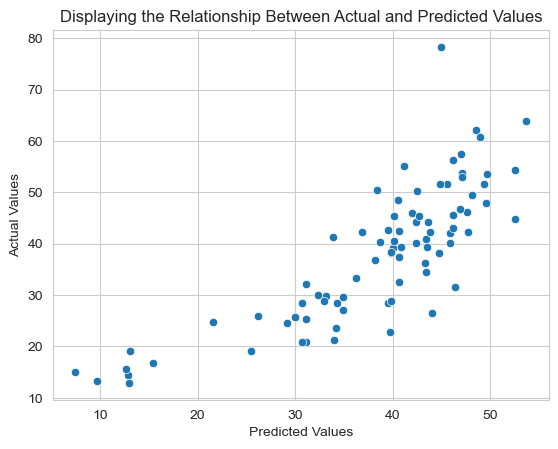

In [107]:
#investingating the Predicted values 
sns.scatterplot(x=yhat,y=y_test)
plt.title("Displaying the Relationship Between Actual and Predicted Values")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")


# 
The scatter plot shows that there is a positive correlation between the predicted values and the actual values which is a good sign. 

C:\Users\USER\AppData\Local\Temp\ipykernel_9828\3426391011.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,  bins=10, kde=True)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


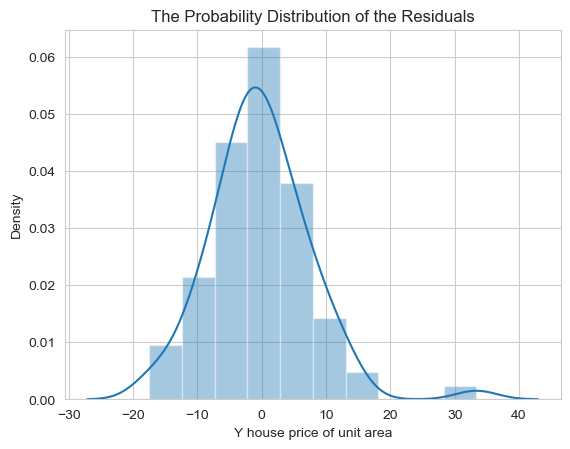

In [126]:
#Investigating if the residusls are normally distributed using a distribution plot 
residuals = y_test - yhat
sns.distplot(residuals,  bins=10, kde=True)
plt.title("The Probability Distribution of the Residuals")
plt.show()

# 
The residuals follow a Normal Distribution according to the distribution plot. This indicates that the model is a good fit.At this point, hyperparameter tuning is not necessary, but you can still do it if needed.

In [138]:
#Hyperparameter Tuning using Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
grid_search = GridSearchCV(ridge,{
    "alpha": [0.01,0.1,1,10,100] 
},cv=5)
grid_search.fit(X_train,y_train)
scores = grid_search.cv_results_
scores

{'mean_fit_time': array([0.03441672, 0.        , 0.        , 0.        , 0.00312414]),
 'std_fit_time': array([0.05367066, 0.        , 0.        , 0.        , 0.00624828]),
 'mean_score_time': array([0.00312452, 0.00312409, 0.0031249 , 0.00312433, 0.        ]),
 'std_score_time': array([0.00624905, 0.00624819, 0.00624981, 0.00624866, 0.        ]),
 'param_alpha': masked_array(data=[0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_score': array([0.48628708, 0.48994423, 0.48667501, 0.48813294, 0.48370858]),
 'split1_test_score': array([0.63443038, 0.60363354, 0.59143299, 0.6015437 , 0.6101588 ]),
 'split2_test_score': array([0.6929029 , 0.66143353, 0.64553249, 0.63760983, 0.62156449]),
 'split3_test_score': array([0.38798446, 0.38990524, 0.38575403, 0.37987286, 0.37014793]),
 'split4_test_score'

In [97]:
scores = pd.DataFrame(scores)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.065668,0.120766,0.010941,0.004106,0.01,{'alpha': 0.01},0.710510,0.517816,0.657752,0.435836,0.600095,0.584402,0.098016,1
1,0.008022,0.004682,0.002374,0.002088,0.1,{'alpha': 0.1},0.695091,0.504647,0.637999,0.420547,0.599129,0.571482,0.097690,2
2,0.005552,0.002186,0.005095,0.000873,1,{'alpha': 1},0.683312,0.496310,0.625910,0.410849,0.592247,0.561726,0.096827,3
3,0.005659,0.000971,0.003772,0.000519,10,{'alpha': 10},0.675242,0.502362,0.626521,0.405489,0.590664,0.560056,0.095751,4
4,0.005196,0.006009,0.003013,0.002847,100,{'alpha': 100},0.656536,0.510409,0.623922,0.393866,0.582764,0.553500,0.093565,5


The Evaluation results are: 
 The MAE: 5.8044 
 The MSE: 59.7082


<Axes: ylabel='Y house price of unit area'>

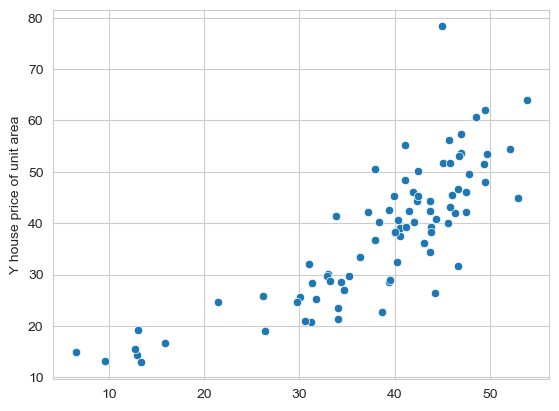

In [171]:
# Predicting with Ridge Regression
ridge_pred = grid_search.predict(X_test)
# Evaluating the Ridge model
print(f"The Evaluation results are: \n The MAE: {mean_absolute_error(y_test,ridge_pred):.4f} \n The MSE: {mean_squared_error(y_test,ridge_pred):.4f}")
sns.scatterplot(x=ridge_pred, y= y_test)

# Conclusion 
Since the best alpha param is 0.01 (ranked first) it suggests that the original model,Linear model, is performing well. Also when you compare the values of the evaluation
metrics that is mean absolute error and mean squared error the linear model seems to be performing better than Ridge Regression model. 
Therefore, we can use the linear model to predict house prices.


 

# Final Model Equation
The equation for predicting house prices using Linear Regression is:

$$
\text{House Prices} = -14866.72 + 5.02 (\text{transaction date}) 
- 0.263 (\text{house age}) 
- 0.00446 (\text{distance to nearest MRT station}) 
+ 1.09 (\text{number of convenience stores}) 
+ 225.49 (\text{latitude}) 
- 6.81 (\text{longitude})
$$

e}) 
$$
 de}) 
$$
